# Neural Network from Scratch
### Author : Alankar
### Reference: Online blogs, towardsdatascience.com

Consider Y, X1, X2, X2

A1 i.e. value to input at the first neuron on in the network is

f(X1,X2,X3)=W11*X1 + W12*X2 + W13*X3 + b11

This is further activated by

A1 = g(f(X1,X2,X3))=g(W11*X1 + W12*X2 + W13*X3 + b11)

Similarly

A2 = g(f(X1,X2,X3))=g(W11*X1 + W12*X2 + W13*X3 + b12)

A3 = g(f(X1,X2,X3))=g(W11*X1 + W12*X2 + W13*X3 + b13)


g is an activation function. Here are a few examples of activation functions

If there are two hidden layers, activated valued on the hidden layers are given by A and B.

A = W1 X + b1

B = W2 A + b2

Y_pred = W3 B + b3

W1, W2, W3 will be matrices of appropriate sizes.

### Sigmoid function in Python

In [142]:
import matplotlib.pyplot as plt
import numpy as np

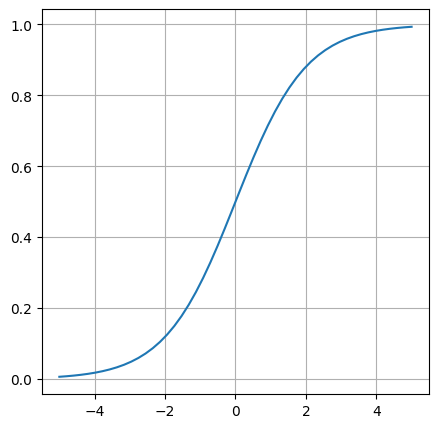

In [143]:
x = np.linspace(-5, 5, 50)
z = 1/(1 + np.exp(-x))

plt.subplots(figsize=(5, 5))
plt.plot(x, z)
plt.grid()
plt.show()

### tanh function in Python

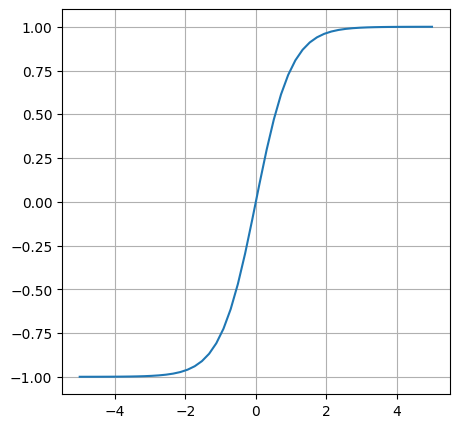

In [144]:
# tanh function in Python
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 5, 50)
z = np.tanh(x)

plt.subplots(figsize=(5, 5))
plt.plot(x, z)
plt.grid()
plt.show()

### Softmax function in Python
Softmax is a generalization sigmoid i.e. Softmax is used in multiple dimensions. And is generally used as an activation function in the output layer.

### Rectified Linear Unit (ReLU)

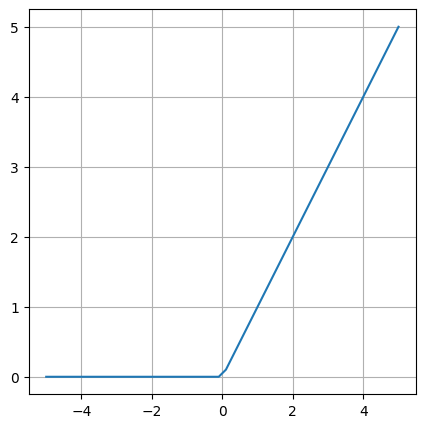

In [145]:
# ReLU in Python
import matplotlib.pyplot as plt
import numpy as np


x = np.linspace(-5, 5, 50)
z = [max(0, i) for i in x]

plt.subplots(figsize=(5, 5))
plt.plot(x, z)
plt.grid()
plt.show()

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Define ReLU function

In [147]:
def relu(z): # takes a numpy array as input and returns activated array
    a = np.maximum(0,z)
    return a

### Initialize parameters

In [148]:
def initialize_params(layer_sizes): #takes a list of the layer sizes as input and returns initialized parameters
    params = {}
    for i in range(1, len(layer_sizes)):
        params['W' + str(i)] = np.random.randn(layer_sizes[i], layer_sizes[i-1])*0.01
        # rand(d0,d1) will return an array of size d0 x d1.
        params['B' + str(i)] = np.random.randn(layer_sizes[i],1)*0.01
    return params

### Loss or cost is defined as $J(W, B) = \frac{1}{2m} * \Sigma (Y_{pred} - Y_{true})^2$

W and B represent weight and bias matrices. m is the number of observastion i.e. data points.

In [149]:
def compute_cost(values, Y_train): #takes true values and dictionary having activations of 
# all layers as input and returns cost
    layers = len(values)//2
    Y_pred = values['A' + str(layers)]
    cost = 1/(2*len(Y_train)) * np.sum(np.square(Y_pred - Y_train))
    return cost

### Define forward propagation

In [150]:
def forward_propagation(X_train, params):
    #takes input training features and parameters as input and returns a dictionary 
# containining the numpy arrays of activations of all layers
    layers = len(params)//2
    values = {}
    for i in range(1, layers+1):
        if i==1: # transformation from input layer
            values['Z' + str(i)] = np.dot(params['W' + str(i)], X_train) + params['B' + str(i)]
            values['A' + str(i)] = relu(values['Z' + str(i)])
        else: # transformation from non-input layer
            values['Z' + str(i)] = np.dot(params['W' + str(i)], values['A' + str(i-1)]) + params['B' + str(i)]
            if i==layers: # Do not use activation function in the output layer
                values['A' + str(i)] = values['Z' + str(i)]
            else: # use activation function for non-output layers
                values['A' + str(i)] = relu(values['Z' + str(i)])
    return values

### Define function for backward propagation

In [151]:
def backward_propagation(params, values, X_train, Y_train): 
    #takes parameters, activations, training set as input and returns gradients wrt parameters
    layers = len(params)//2
    m = len(Y_train)
    grads = {}
    for i in range(layers,0,-1):
        if i==layers:
            dA = 1/m * (values['A' + str(i)] - Y_train)
            dZ = dA
        else:
            dA = np.dot(params['W' + str(i+1)].T, dZ)
            dZ = np.multiply(dA, np.where(values['A' + str(i)]>=0, 1, 0))
        if i==1:
            grads['W' + str(i)] = 1/m * np.dot(dZ, X_train.T)
            grads['B' + str(i)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
        else:
            grads['W' + str(i)] = 1/m * np.dot(dZ,values['A' + str(i-1)].T)
            grads['B' + str(i)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
    return grads

### Function for updating paramters (this is done after backpropagation)

In [152]:
def update_params(params, grads, learning_rate): 
    #takes parameters, gradients and learning rate as input and returns updated parameters
    layers = len(params)//2
    params_updated = {}
    for i in range(1,layers+1):
        params_updated['W' + str(i)] = params['W' + str(i)] - learning_rate * grads['W' + str(i)]
        params_updated['B' + str(i)] = params['B' + str(i)] - learning_rate * grads['B' + str(i)]
    return params_updated

### Define function for accuracy

In [153]:
def compute_accuracy(X_train, X_test, Y_train, Y_test, params): #compute accuracy on test and training data given learnt parameters
    values_train = forward_propagation(X_train.T, params)
    values_test = forward_propagation(X_test.T, params)
    train_acc = np.sqrt(mean_squared_error(Y_train, values_train['A' + str(len(layer_sizes)-1)].T))
    test_acc = np.sqrt(mean_squared_error(Y_test, values_test['A' + str(len(layer_sizes)-1)].T))
    return train_acc, test_acc


### Define function for predicting

In [154]:
def predict(X, params):  #predict on new array X given learnt parameters
    values = forward_propagation(X.T, params)
    predictions = values['A' + str(len(values)//2)].T
    return predictions

### Assemble the model i.e. create the model i.e. setup the model

In [155]:
def model(X_train, Y_train, layer_sizes, num_iters, learning_rate): #trains the model
    params = initialize_params(layer_sizes)
    for i in range(num_iters):
        values = forward_propagation(X_train.T, params)
        cost = compute_cost(values, Y_train.T)
        grads = backward_propagation(params, values,X_train.T, Y_train.T)
        params = update_params(params, grads, learning_rate)
        # print('Cost at iteration ' + str(i+1) + ' = ' + str(cost) + '\n')
    return params

### Run the model

In [156]:
# import pandas for importing csv files  
import pandas as pd
from sklearn.preprocessing import normalize
# from sklearn.datasets import load_boston
data = np.genfromtxt('dummy_data.csv', delimiter=',')                                               #load dataset
# X,Y = dataset["data"], dataset["target"]                                                #separate data into input and output features
X = data[:, :-1]  # Select all rows, and all columns except the last one
Y = data[:, -1]   # Select all rows, and only the last column
# There are 13 features and 1 target.

In [157]:
# print(X)
# print()
# print()
# print(Y)

In [158]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets with an 80:20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [159]:
layer_sizes = [13, 8, 8, 1] #list containing the number of neurons in each layer
params=model(X_train, Y_train, layer_sizes, 1000, 0.01) #train the model

In [160]:
# print(params)

In [161]:
compute_accuracy(X_train, X_test, Y_train, Y_test, params) #compute accuracy on test and training data given learnt parameters

(8.944903237552355, 8.366294622130322)

In [162]:
Y_pred = predict(X_test, params)
Y_pred #predict on test set

array([[24.50206107],
       [25.4650899 ],
       [23.84216973],
       [23.99939487],
       [23.49123198],
       [23.00713332],
       [24.05212072],
       [23.73310161],
       [24.18411732],
       [24.42512452],
       [24.46263972],
       [24.12297963],
       [ 4.80621779],
       [23.71562362],
       [24.16908575],
       [22.85867628],
       [23.42187118],
       [22.51172684],
       [26.26707021],
       [24.19183355],
       [24.91774209],
       [25.40958365],
       [22.16204599],
       [24.23860693],
       [19.53192211],
       [21.48020044],
       [24.29293759],
       [ 0.34837684],
       [24.26975484],
       [24.3973734 ],
       [24.51763909],
       [24.5185254 ],
       [24.18168305],
       [23.34811726],
       [20.16220384],
       [16.12093598],
       [24.37686071],
       [24.51401099],
       [23.46408351],
       [23.12042754],
       [24.30236942],
       [25.40407943],
       [26.40625378],
       [24.64472622],
       [24.27338387],
       [24